#  Mushroom Dataset - SVM Classification (EDA, Preprocessing, Modeling)

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# Step 2: Load Dataset
df= pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
# Step 3: Basic Exploration
print("Shape of the dataset:", df.shape)
print("Dataset Info:\n")
print(df.info())
print("\nClass Distribution:\n", df['class'].value_counts())

Shape of the dataset: (2000, 26)
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_b

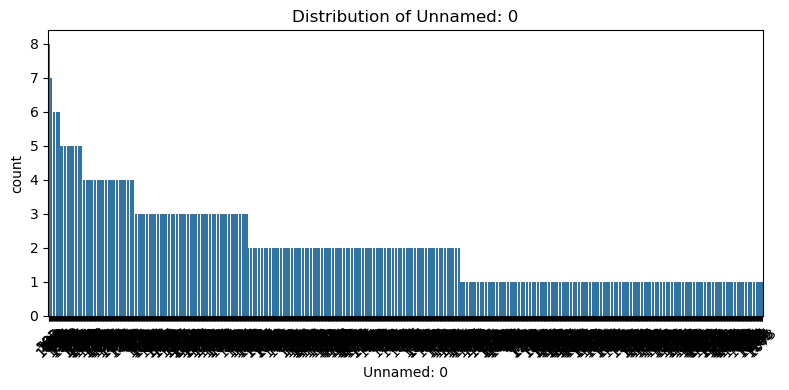

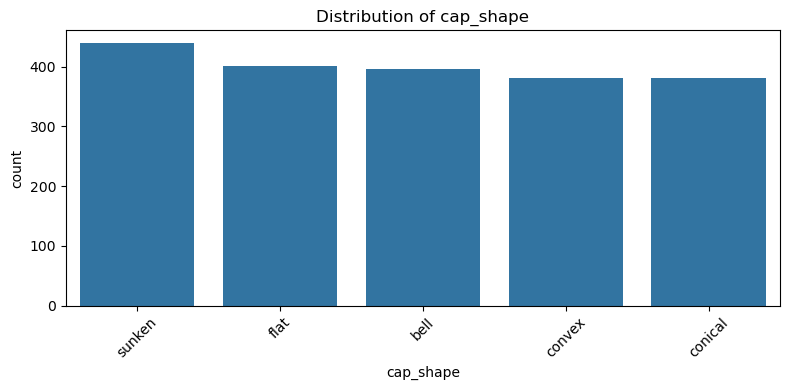

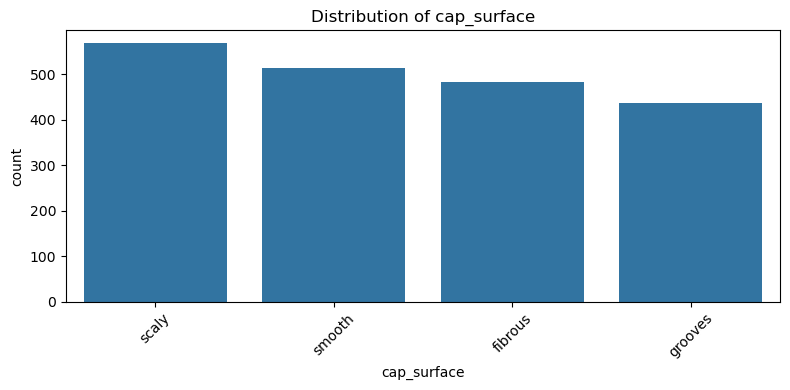

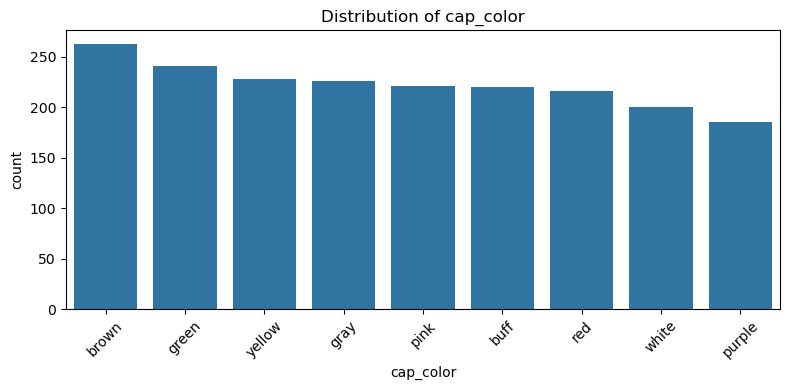

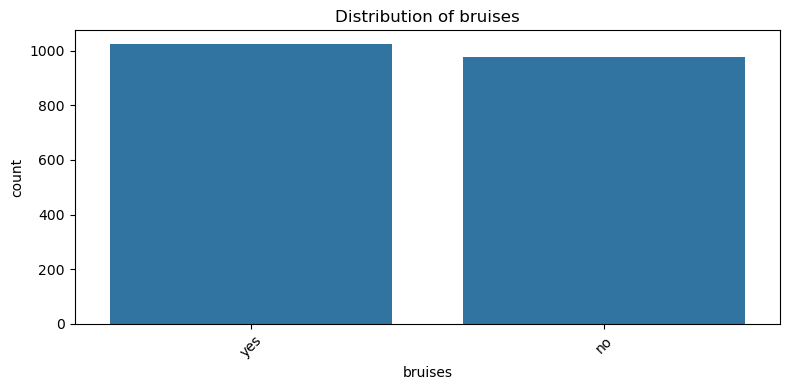

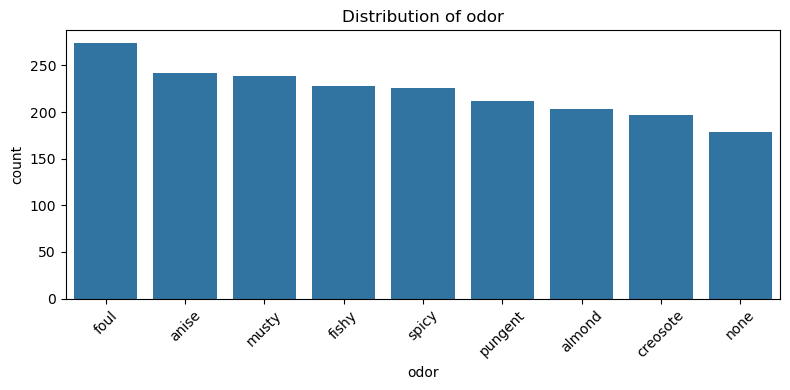

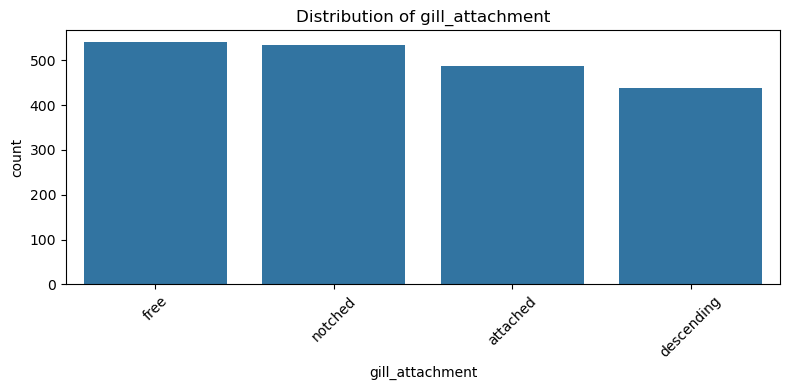

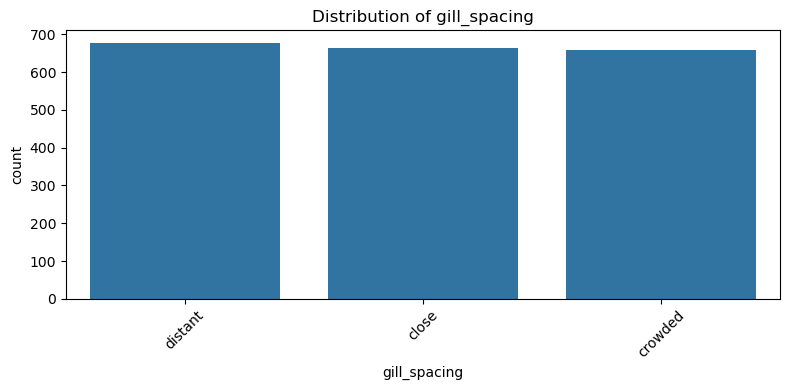

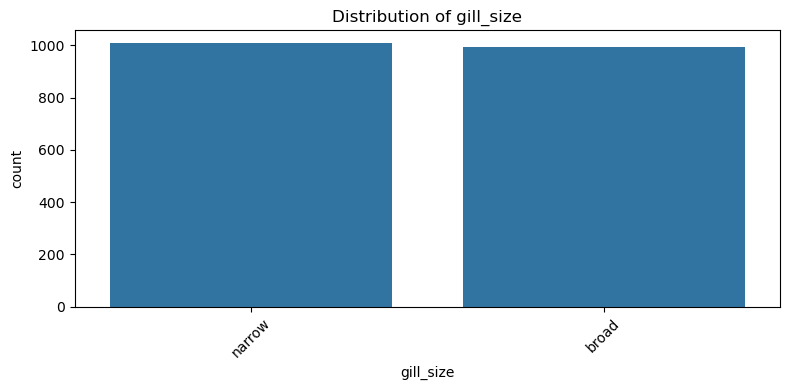

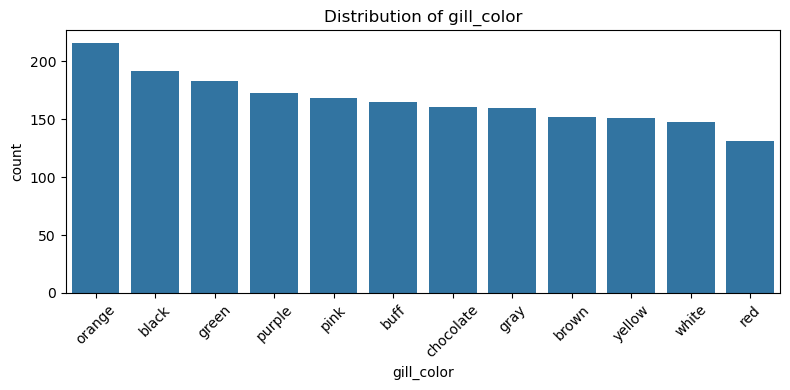

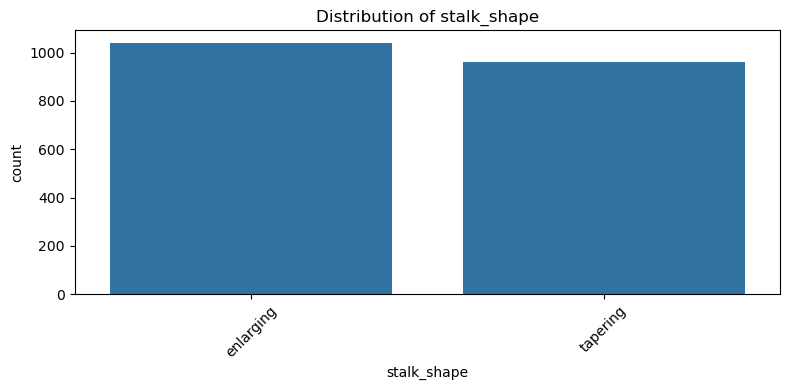

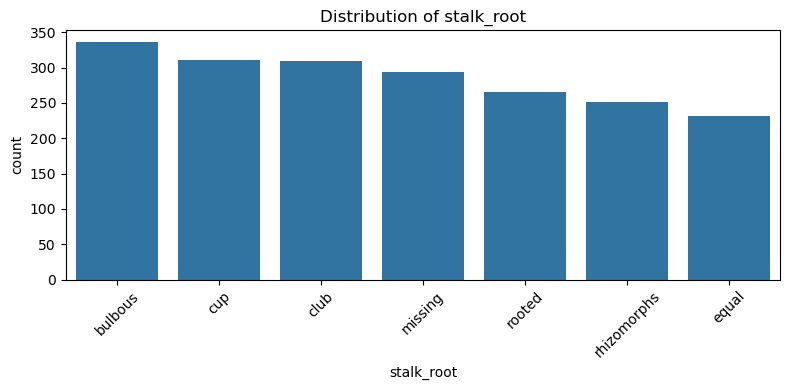

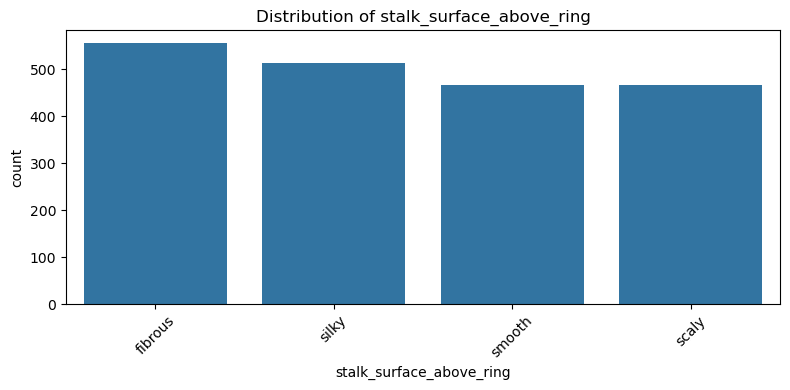

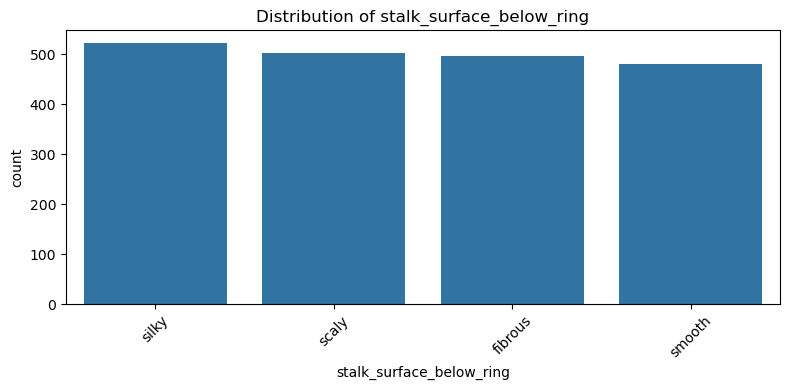

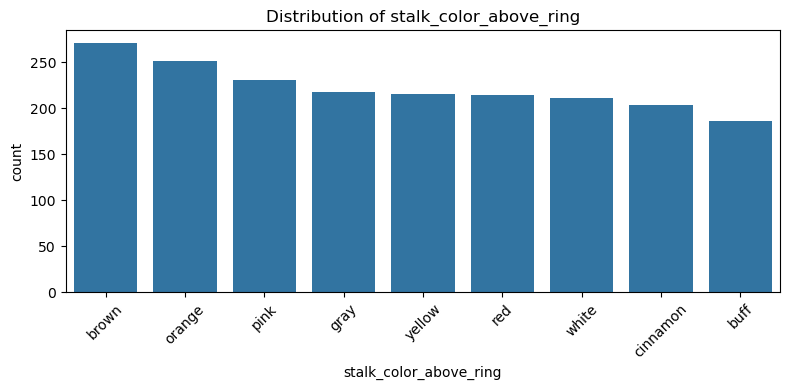

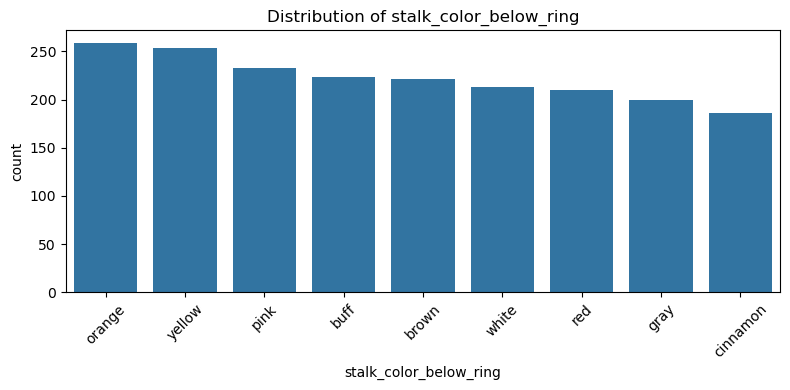

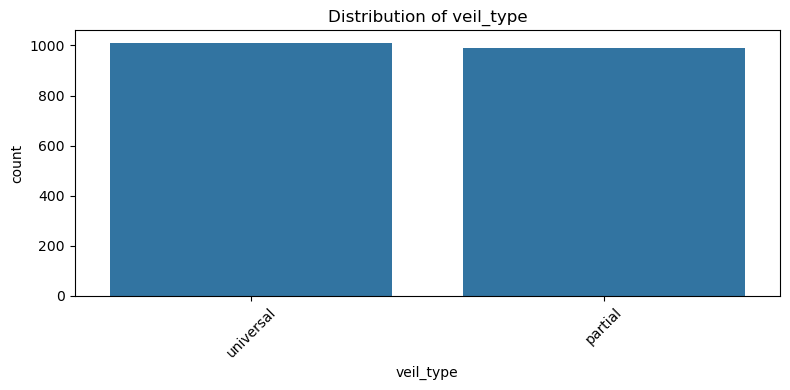

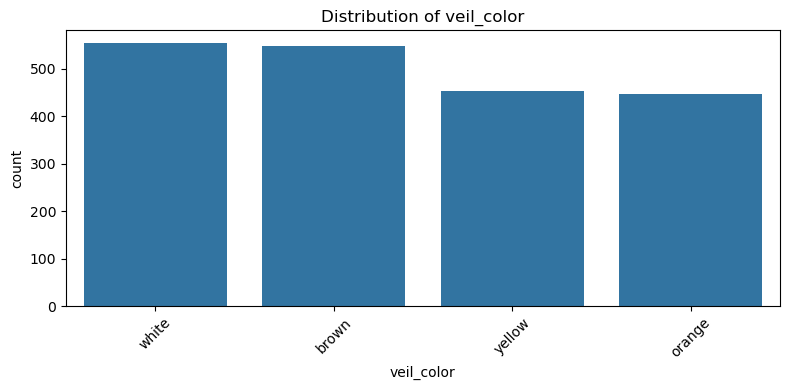

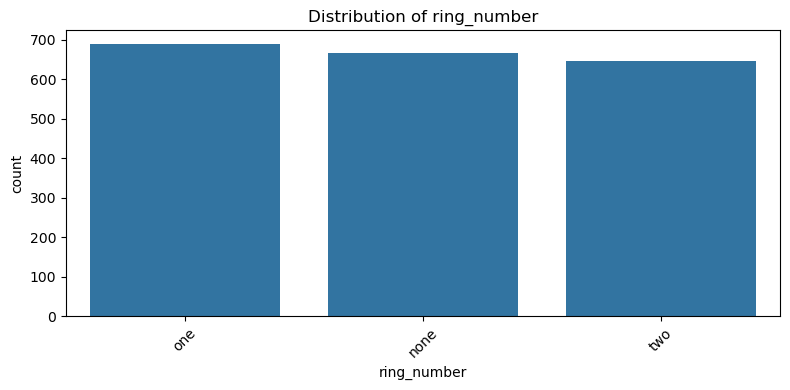

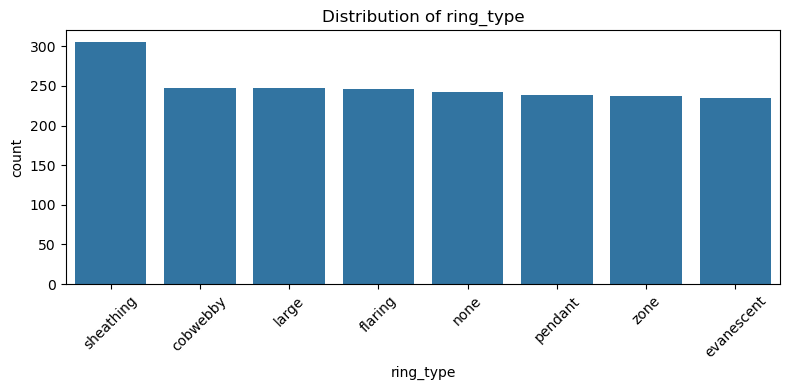

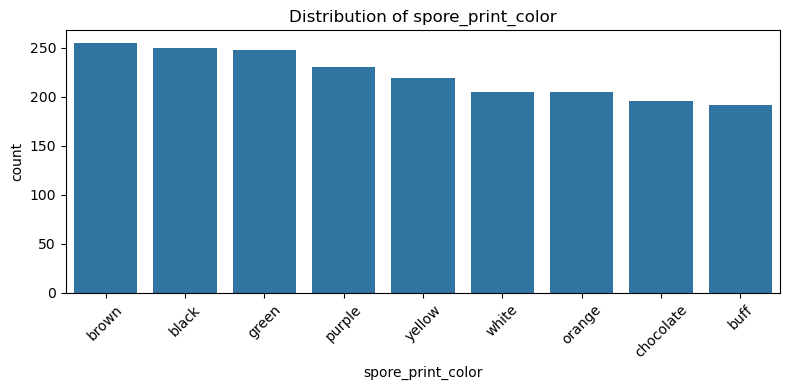

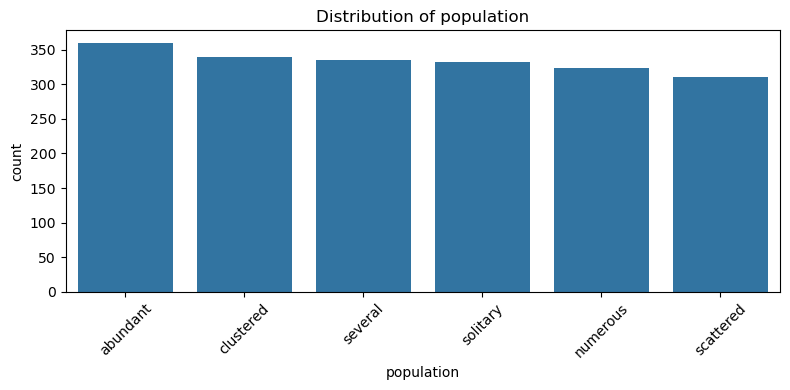

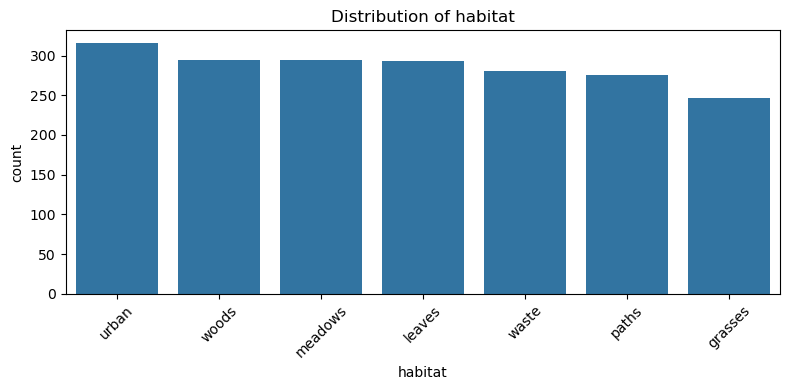

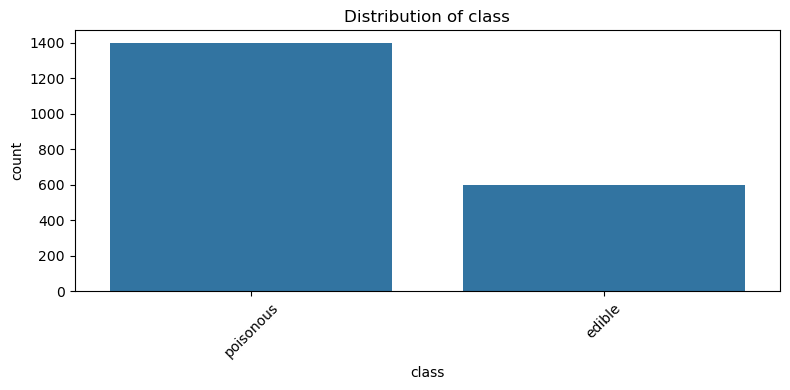

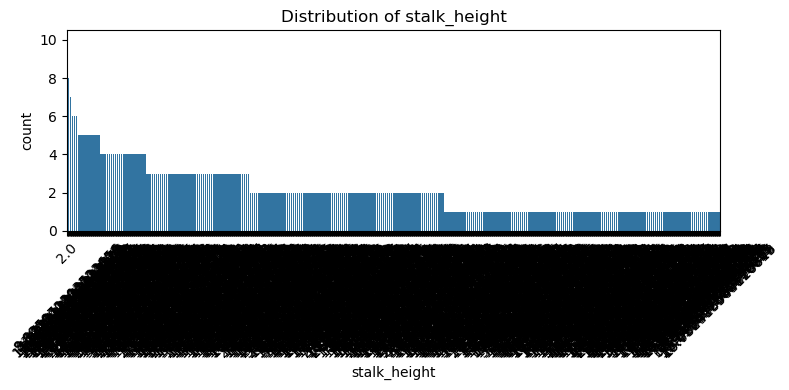

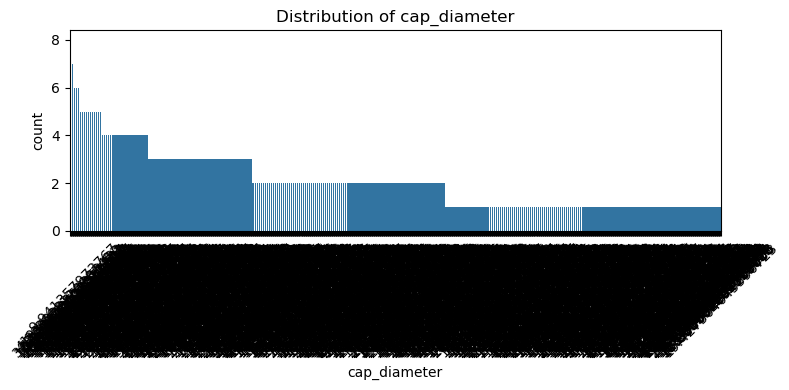

In [4]:
# Step 4: Feature Distribution
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

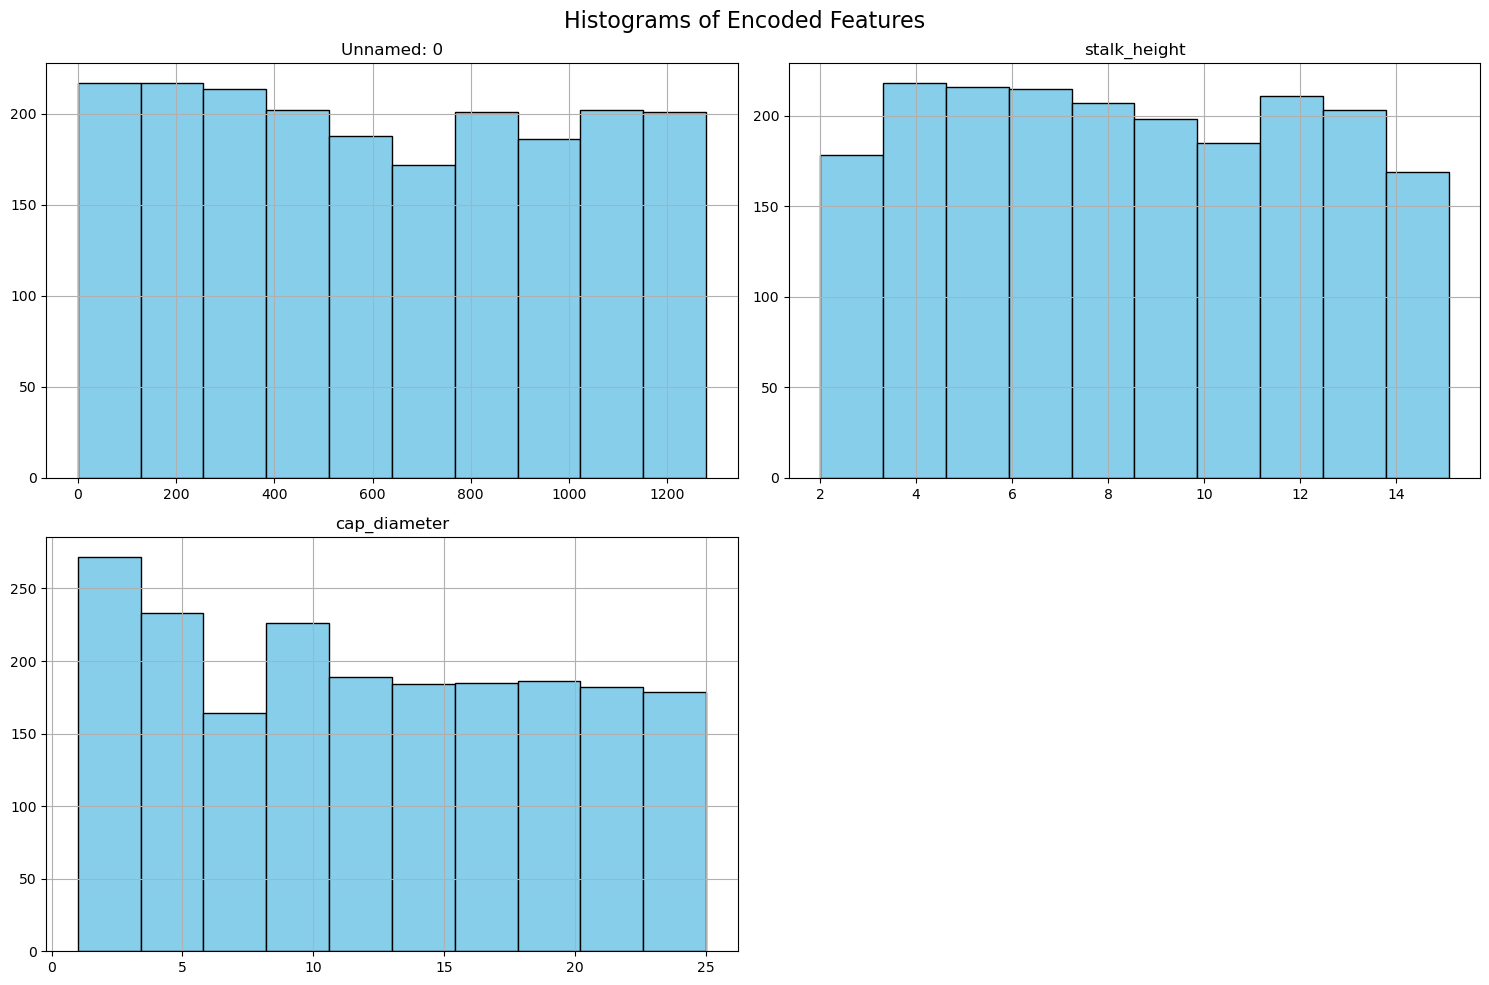

In [5]:
# Histograms (after encoding)
df_encoded = df.copy()
df_encoded.hist(bins=10, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Encoded Features", fontsize=16)
plt.tight_layout()
plt.show()

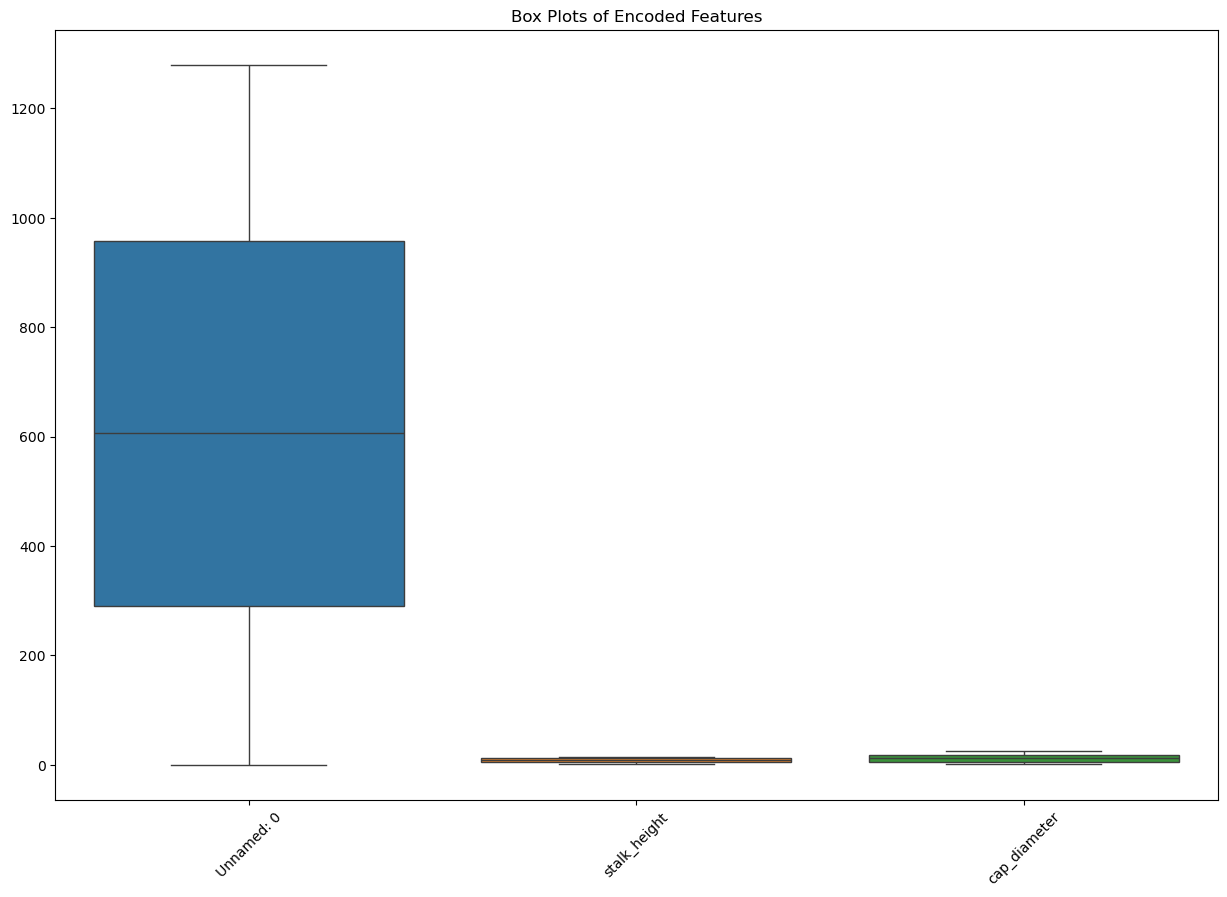

In [6]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_encoded)
plt.title("Box Plots of Encoded Features")
plt.xticks(rotation=45)
plt.show()


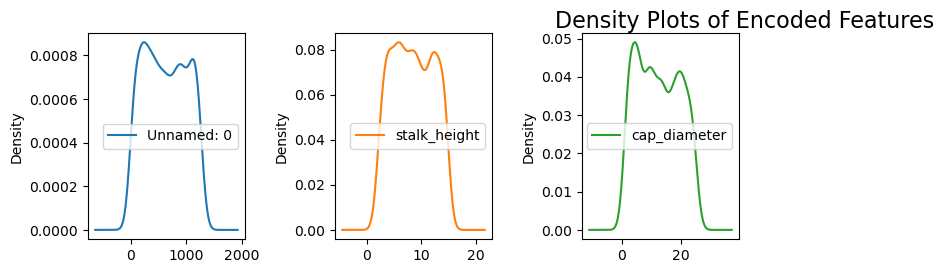

In [7]:
# Density (KDE) Plots
df_encoded.plot(kind='kde', subplots=True, layout=(6,6), figsize=(15, 15), sharex=False)
plt.suptitle("Density Plots of Encoded Features", fontsize=16)
plt.tight_layout()
plt.show()


In [8]:
# Step 5: Encode Categorical Features
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

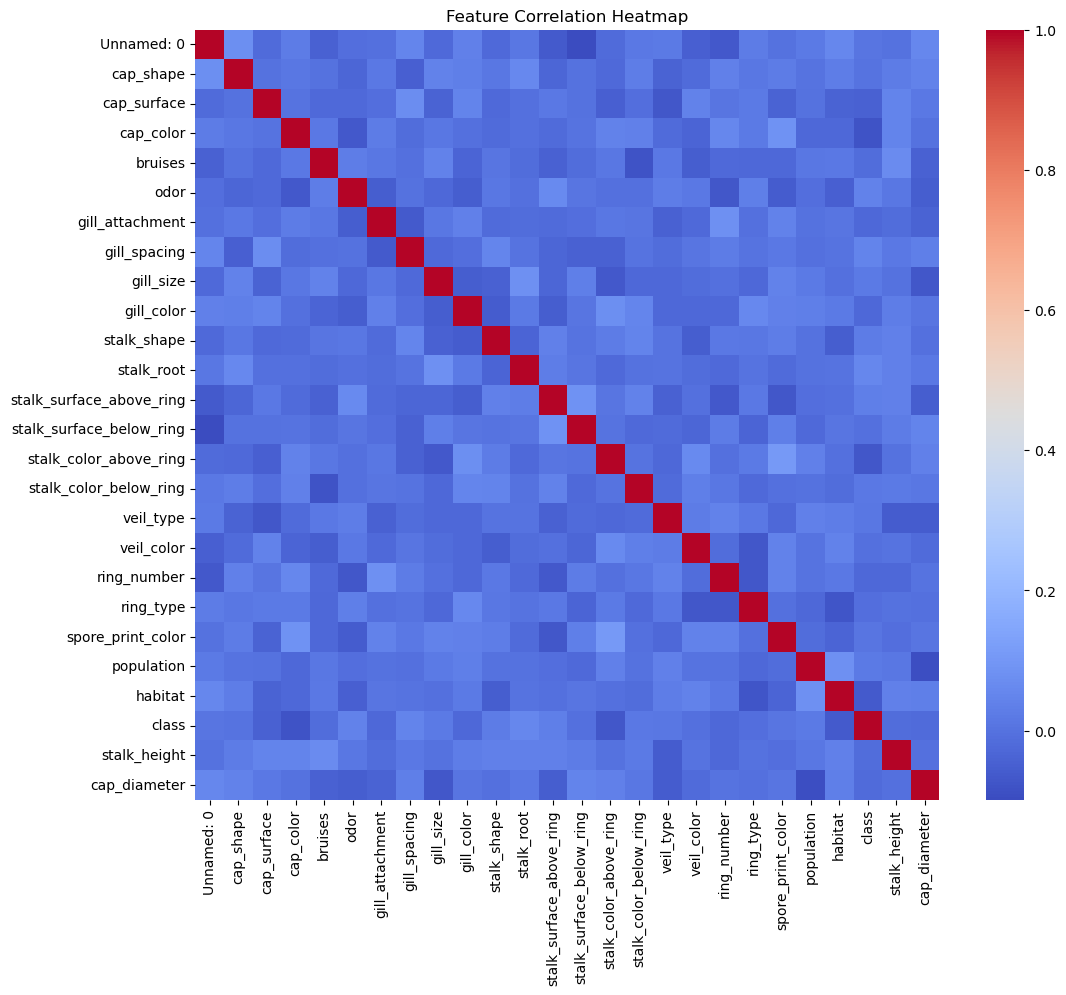

In [9]:
# Step 6: Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [10]:
# Step 7: Split Data
x=df.drop('class', axis=1)## features
y= df['class'] ## Target
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 25)
(400, 25)
(1600,)
(400,)


In [15]:
# Step 8: Train SVM Model (Basic)
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6675

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


Confusion Matrix:
 [[  0 133]
 [  0 267]]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
# PCA for 2D Visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)

X_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
svm_pca = SVC(kernel='rbf')
svm_pca.fit(x_train_pca, y_train_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_test_pca[:, 0], y=x_test_pca[:, 1],
                hue=svm_pca.predict(x_test_pca), palette='Set1', alpha=0.7)
plt.title("SVM Classification Results (PCA Reduced 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()